Подключение библиотек

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

Класс динейного дискриминантного анализа

In [2]:
"""Linear Discriminant Analysis, LDA"""
class LDA:
    def __init__(self, x_train, y_train):

        self.x = np.array(x_train)
        self.y = np.array(y_train)
        self.classes = np.unique(y_train)
        self.means, self.total_mean = self._means()
        self.Sb = self._Sb()
        self.Sw = self._Sw()
        self.transform_matrix = np.dot(np.linalg.inv(self.Sw), 
                                       (self.means[0] - self.means[1]))
        self.t_means = []
        self.t_stds = []
        for cls in self.classes:
            data = self.x[self.y == cls, :]
            proj = np.dot(data, self.transform_matrix)
            self.t_means.append(proj.mean())
            self.t_stds.append(proj.std())
    
    def predict(self, x_test):
        proj = np.dot(x_test, self.transform_matrix)
        return np.argmax(self._gaussian(proj), axis=0)
    
    def make_projection(self, x_test):
        return np.dot(x_test, self.transform_matrix)
    
    def _means(self):
        means = []
        for cls in self.classes:
            data = self.x[self.y == cls, :]
            means.append(data.mean(axis=0))
        return means, np.mean(means, axis=0)

    def _Sb(self):
        """
        Вычисление ковариации между классами
        """
        number_features = self.x.shape[1]
        Sb = np.zeros((number_features, number_features))
        for cls in range(len(self.classes)):
            Sb += self.means[cls] - self.total_mean
        return Sb
    
    def _Sw(self):
        """
        Вычисление ковариации внутри классов
        """
        number_features = self.x.shape[1]
        Sw = np.zeros((number_features, number_features))
        for cls in self.classes:
            data = self.x[self.y == cls, :]
            Sw += np.cov(data, rowvar=False) 
        return Sw
    
    def _gaussian(self, x):
        """
        Вычисление распределения Гаусса
        """
        result = []
        for i in range(len(self.means)):
            mean = self.t_means[i]
            std = self.t_stds[i]
            result.append(
                1 / (std * np.sqrt(2 * np.pi)) * np.exp((-(x - mean) ** 2) / (2 * std ** 2))
            )
        return result

Получение датасета

In [3]:
"""
Выбранный датасет имеет 150 экземпляров ириса,
по 50 экземпляров из трёх видов: 
Ирис щетинистый (Iris setosa) - с по 1 по 50 экземпляры, 
Ирис виргинский (Iris virginica) - с по 51 по 100 экземпляры, 
Ирис разноцветный (Iris versicolor) - с по 101 по 150 экземпляры.

Характеристики каждого цветка:
1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).
"""
iris_ds = datasets.load_iris()
# Сохранение данных только о Iris virginica и Iris versicolor
data = iris_ds.data[50:, :] 
labels = iris_ds.target[50:]

Размерности данных

In [4]:
data.shape, labels.shape

((100, 4), (100,))

Псевдослучайное распределение данных на тренировочные и тестовые

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

Создание экземпляра класса

In [6]:
lda = LDA(x_train, y_train)

Прогнозирование

In [7]:
preds = lda.predict(x_test)

Составление отчёта

In [8]:
report = classification_report(preds, y_test - 1)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.95      0.90      0.92        20

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



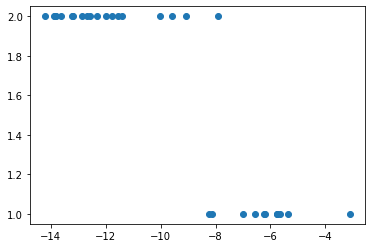

In [9]:
plt.scatter(lda.make_projection(x_test), y_test)